In [12]:
from sympy import*
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer = True)
f, g, h = symbols('f g h', cls = Function)
import math

In [1]:
def f(t, y):
    return y - t**2 + 1

In [2]:
def y(t):
    return (t + 1)**2 - 0.5*exp(t)

In [15]:
def Euler(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        current_w = current_w + stepSize * f(t, current_w)        
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [16]:
def Heun2(startPoint, endPoint, numIntervals, initialCondition):
    stepSize = (endPoint - startPoint) / numIntervals
    tlist = [startPoint]
    wlist = [initialCondition]
    t = startPoint
    current_w = initialCondition
    
    for i in range (1, numIntervals + 1):
        k1 = f(t, current_w) #Euler's
        k2 = f(t + stepSize, current_w + stepSize * k1)
        slope = (k1 + k2) / 2
        current_w = current_w + stepSize * slope       
        t = startPoint + i * stepSize
        tlist.append(t)
        wlist.append(current_w)
    
    return tlist, wlist

In [17]:
tlist, wlist = Euler(0, 2, 10, 0.5)
ylist = []
error = []
length = len(tlist)
for i in range(0, length):
    ylist = ylist + [y(tlist[i])]
    error = error + [abs(y(tlist[i]) - wlist[i])]
     
#for i in range(0, 11):
 #   print ('t = %.1f, w = %.7f, y = %.7f, error = %.7f'%(tlist[i], wlist[i], ylist[i], error[i]))


tlist1, wlist1 = Heun2(0, 2, 10, 0.5)
ylist1 = []
error1 = []
length = len(tlist)
for i in range(0, length):
    ylist1 = ylist1 + [y(tlist1[i])]
    error1 = error1 + [abs(y(tlist1[i]) - wlist1[i])]
     
for i in range(0, 11):
    print ('t = %.1f, error_e = %.7f, error_w = %.7f, true_y = %.7f'%(tlist[i], error[i], error1[i], ylist[i]))

t = 0.0, error_e = 0.0000000, error_w = 0.0000000, true_y = 0.5000000
t = 0.2, error_e = 0.0292986, error_w = 0.0032986, true_y = 0.8292986
t = 0.4, error_e = 0.0620877, error_w = 0.0071677, true_y = 1.2140877
t = 0.6, error_e = 0.0985406, error_w = 0.0116982, true_y = 1.6489406
t = 0.8, error_e = 0.1387495, error_w = 0.0169938, true_y = 2.1272295
t = 1.0, error_e = 0.1826831, error_w = 0.0231715, true_y = 2.6408591
t = 1.2, error_e = 0.2301303, error_w = 0.0303627, true_y = 3.1799415
t = 1.4, error_e = 0.2806266, error_w = 0.0387138, true_y = 3.7324000
t = 1.6, error_e = 0.3333557, error_w = 0.0483866, true_y = 4.2834838
t = 1.8, error_e = 0.3870225, error_w = 0.0595577, true_y = 4.8151763
t = 2.0, error_e = 0.4396874, error_w = 0.0724173, true_y = 5.3054720


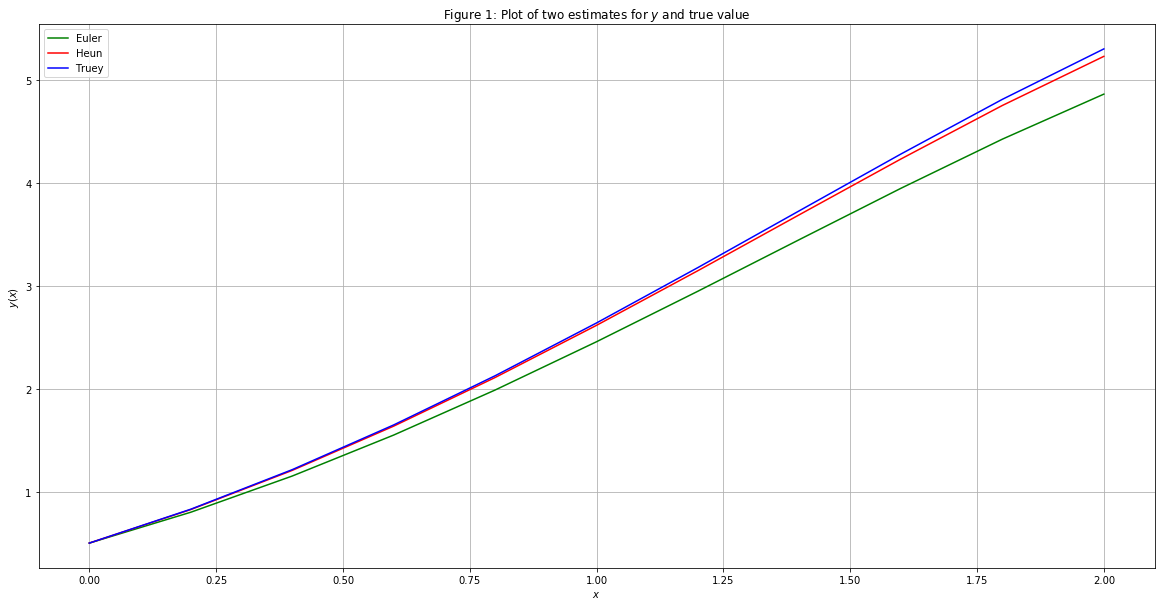

In [23]:
plt.figure(figsize=(20,10))
plt.plot(tlist,wlist, color = "g", label = "Euler")
plt.plot(tlist1,wlist1, color = "r", label = "Heun")
plt.plot(tlist,ylist, color = "b", label = "Truey")
plt.plot()
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title("Figure 1: Plot of two estimates for $y$ and true value")
plt.legend()
plt.grid(True)
plt.show()